In [17]:
import numpy as np

stability_sens_masses, stability_sens_sigmav  = np.load('data/stability_sens_test/sensitivity_plot_vals.npy')
highres_sens_masses, highres_sens_sigmav  = np.load('data/highres_sens/sensitivity_plot_vals.npy')
CTA_paper_points = np.genfromtxt('gammabayes/aux_data/sensitivitypaper_points.csv', delimiter=',')
CTA_paper_points

array([[1.39905031e+02, 3.52873502e-26],
       [1.53992653e+02, 3.04878630e-26],
       [1.66277441e+02, 2.70732057e-26],
       [1.81273088e+02, 2.44843675e-26],
       [1.96675381e+02, 2.25514569e-26],
       [2.23872114e+02, 2.02094994e-26],
       [2.57286303e+02, 1.81107530e-26],
       [2.92864456e+02, 1.63789371e-26],
       [3.41454887e+02, 1.48127237e-26],
       [3.98107171e+02, 1.36433379e-26],
       [4.66390827e+02, 1.24519708e-26],
       [5.49013891e+02, 1.16804700e-26],
       [6.43181188e+02, 1.10573433e-26],
       [7.57123396e+02, 1.05635410e-26],
       [8.91250938e+02, 1.02779089e-26],
       [1.04913973e+03, 1.00917911e-26],
       [1.24093776e+03, 1.00000000e-26],
       [1.45378439e+03, 1.00917911e-26],
       [1.71955736e+03, 1.01844249e-26],
       [1.99526231e+03, 1.03722510e-26],
       [2.31517238e+03, 1.07583590e-26],
       [2.73841963e+03, 1.12612682e-26],
       [3.07255737e+03, 1.14689540e-26],
       [3.43096799e+03, 1.18958869e-26],
       [3.924189

[]

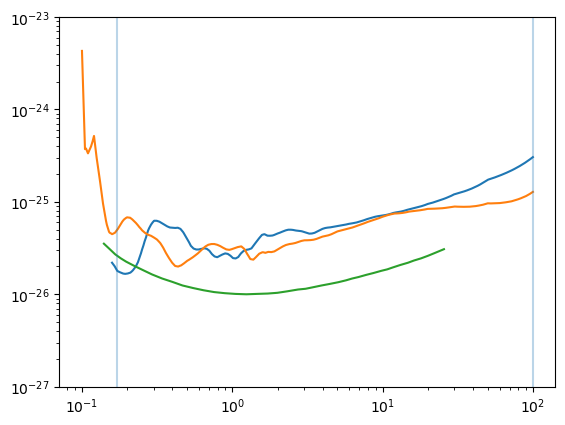

In [47]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(stability_sens_masses, stability_sens_sigmav)
plt.plot(highres_sens_masses, highres_sens_sigmav)
plt.plot(CTA_paper_points[:,0]/1000, CTA_paper_points[:,1])
plt.ylim([1e-27, 1e-23])
plt.axvline(0.17, alpha=0.3)
plt.axvline(100, alpha=0.3)
plt.loglog()

In [3]:
stability_sens_masses.shape, highres_sens_masses.shape, np.min(stability_sens_masses), np.min(highres_sens_masses), np.max(stability_sens_masses), np.max(highres_sens_masses)

((360,), (291,), 0.15848931924611134, 0.1, 100.0, 100.0)

In [4]:
360-291

69

In [5]:
from scipy.interpolate import interp1d

In [56]:
massvals = np.logspace(np.log10(0.12), np.log10(99.99),201)
stability_sens_interp = interp1d(x=stability_sens_masses, y=stability_sens_sigmav, kind='quadratic', bounds_error=False, fill_value='extrapolate')
highres_sens_interp = interp1d(x=highres_sens_masses, y=highres_sens_sigmav, kind='quadratic')
np.min(massvals), np.max(massvals)

(0.11999999999999998, 99.99000000000001)

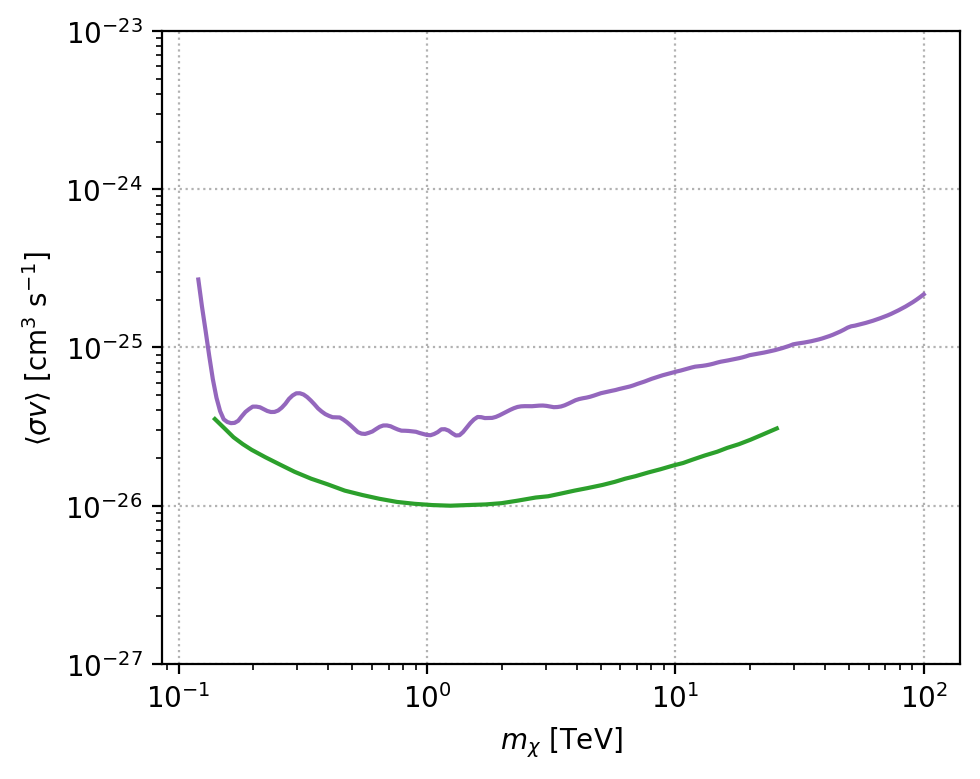

In [57]:
plt.figure(figsize=(5,4), dpi=200)
# plt.plot(massvals, stability_sens_interp(massvals), alpha=0.3, c='tab:red', ls='--')
# plt.plot(massvals, highres_sens_interp(massvals), alpha=0.3, c='tab:blue', ls='--')
plt.plot(massvals, (highres_sens_interp(massvals)+stability_sens_interp(massvals))/2, c='tab:purple')
plt.plot(CTA_paper_points[:,0]/1000, CTA_paper_points[:,1], c='tab:green')
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]")
plt.xlabel(r"$m_\chi$ [TeV]")
plt.grid(axis='both', ls=':', c='grey', alpha=0.6)
plt.ylim([1e-27, 1e-23])
plt.loglog()
plt.tight_layout()
plt.show()